In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from matplotlib import rcParams, cycler
from matplotlib.cm import ScalarMappable

In [2]:
optimizer_selection = [
    'Adam',
    'AdamW',
    'Adamax',
    'Adagrad',
    'Adafactor',
    'Ftrl',
    'Lion',
    'Nadam',
]
optimizer_results = {}
for selection in optimizer_selection:
    with open(f'sgcc_optimization_via_{selection}.pkl.pkl', 'rb') as f:
        optimizer_results[selection] = pickle.load(f)

In [3]:
def minmax_norm(array, lower, upper):
    if (array.max() - array.min()) != 0:
        norm = (array - array.min()) / (array.max() - array.min())
        return lower + (norm * (upper-lower))
    else:
        return array

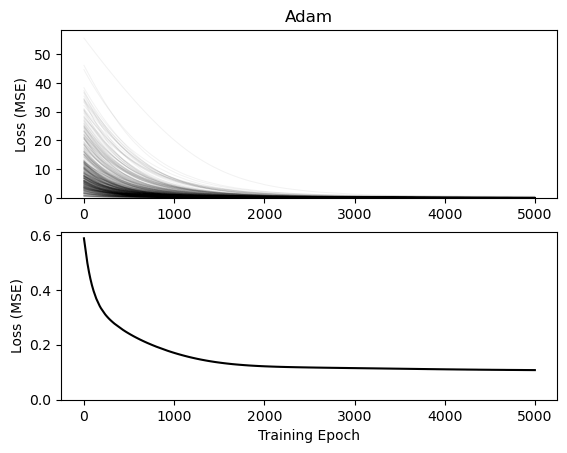

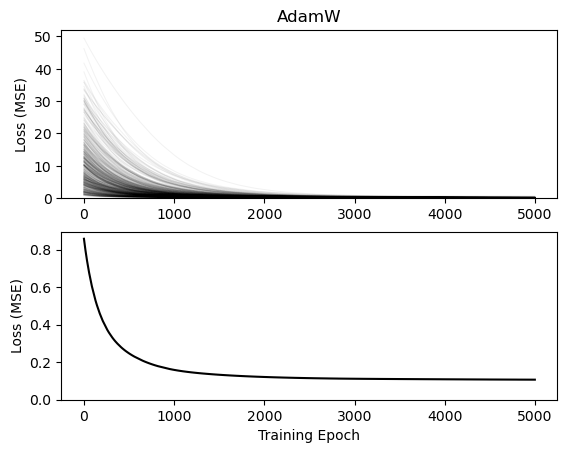

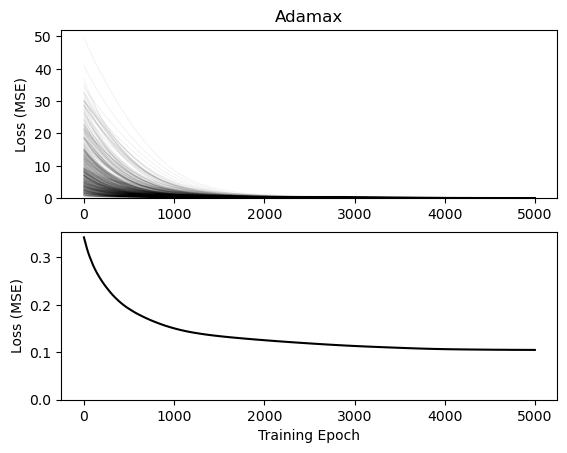

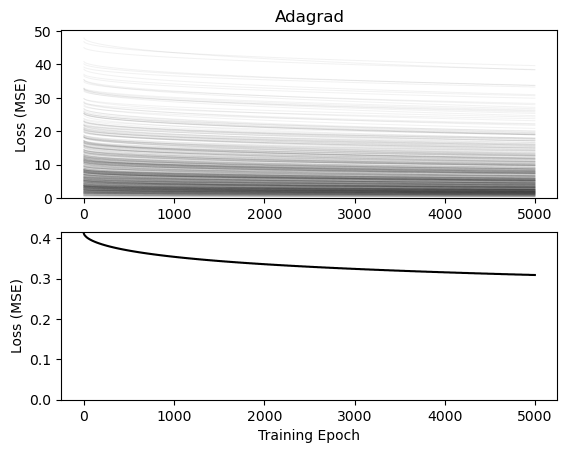

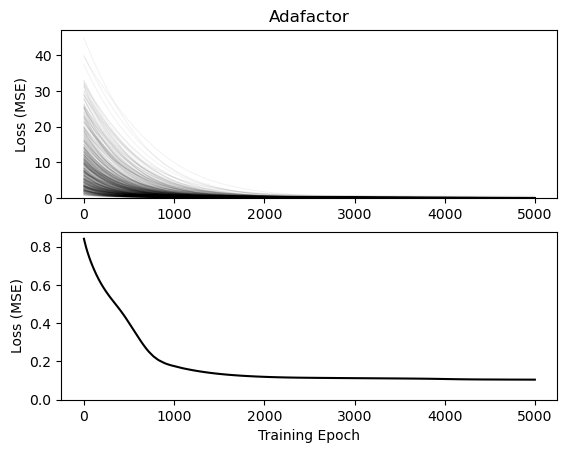

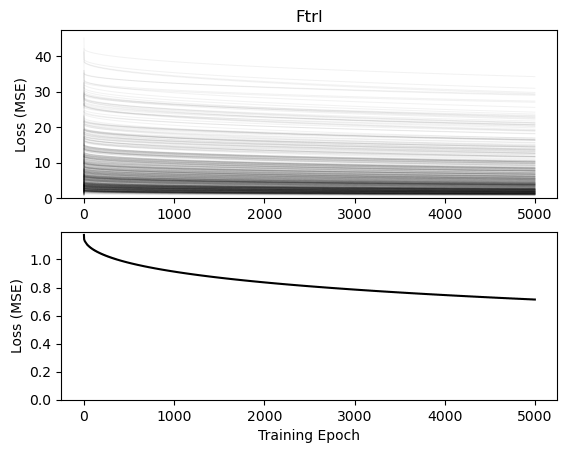

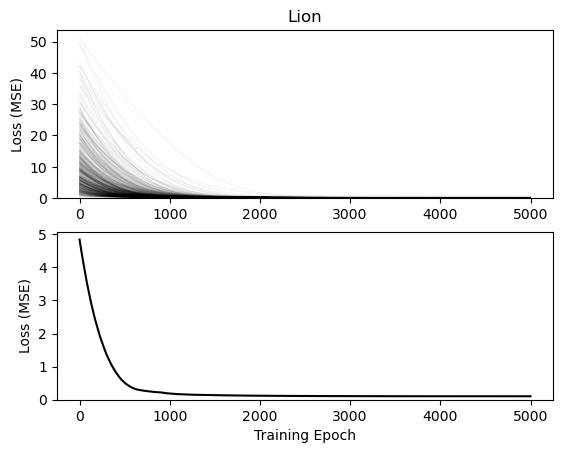

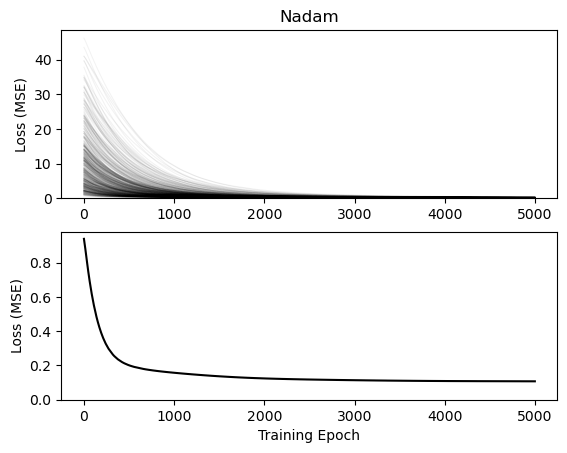

In [4]:
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(0, 1)

for key, val in optimizer_results.items():
    loss_decay = val['loss_decay']
    last_epoch = loss_decay[-1]
    best = np.where(last_epoch == last_epoch.min())[0][0]

    fig, ax = plt.subplots(2)

    for i, decay in enumerate(loss_decay.T):
        ax[0].plot(decay, alpha = 0.05, color = 'black', linewidth = 0.75)
    ax[1].set_xlabel("Training Epoch")
    ax[0].set_ylabel("Loss (MSE)")
    ax[0].set_ylim(0,)

    ax[1].set_ylabel("Loss (MSE)")
    ax[1].plot(loss_decay[:,best], alpha = 1, color = 'black')
    ax[1].set_ylim(0.)
    ax[0].set_title(key)

In [5]:
optimizer_loss_checkpoints = []
for i, checkpoint in enumerate(range(999,5999,1000)):
    optimizers = []
    optimizer_loss_checkpoints.append(optimizers)
    for key, value in optimizer_results.items():
        optimizer_loss_checkpoints[i].append(value['loss_decay'][checkpoint])

Text(0.5, 1.0, 'Loss distributions at 1000 epochs')

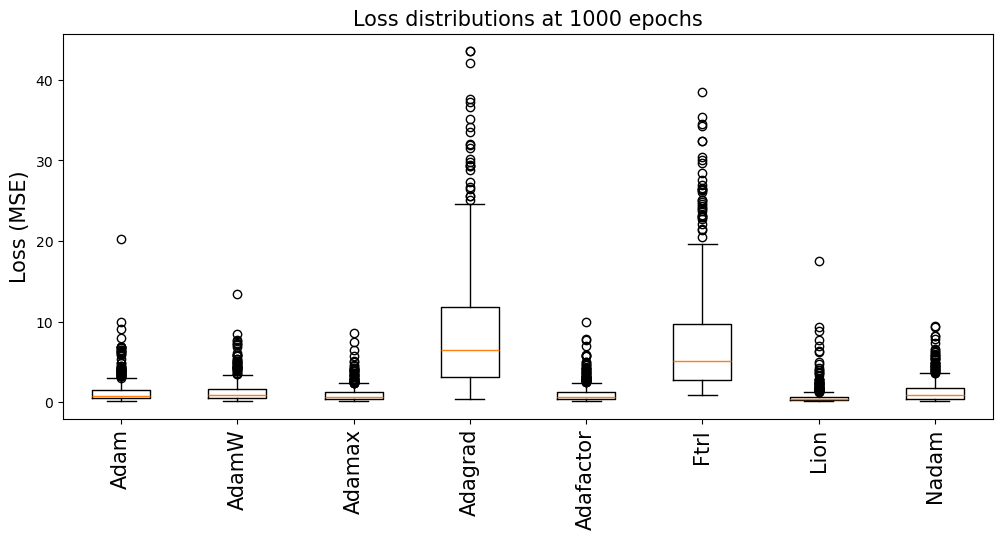

In [6]:
fig, ax = plt.subplots(figsize = (12,5))

optimizer_labels = list(optimizer_results.keys())

ax.boxplot(optimizer_loss_checkpoints[0])
ax.set_xticklabels(optimizer_labels, rotation = 90, fontsize = 15)
ax.set_ylabel("Loss (MSE)", fontsize = 15)
ax.set_title("Loss distributions at 1000 epochs", fontsize = 15)

In [7]:
## because Adagrad and Ftrl underperform, delete them from the dictionary

del optimizer_results['Adagrad']
del optimizer_results['Ftrl']

In [8]:
optimizer_loss_checkpoints = []
for i, checkpoint in enumerate(range(999,5999,1000)):
    optimizers = []
    optimizer_loss_checkpoints.append(optimizers)
    for key, value in optimizer_results.items():
        optimizer_loss_checkpoints[i].append(value['loss_decay'][checkpoint])

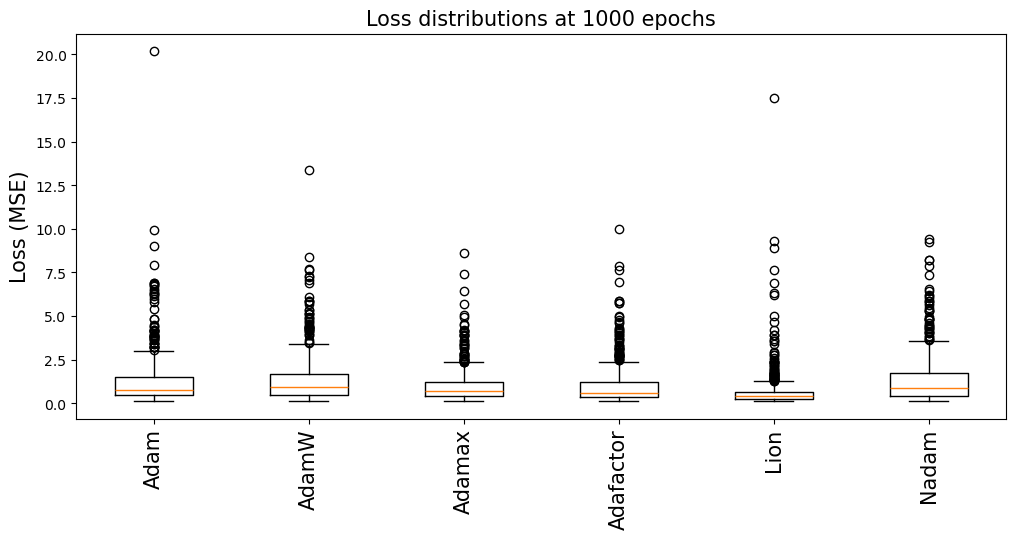

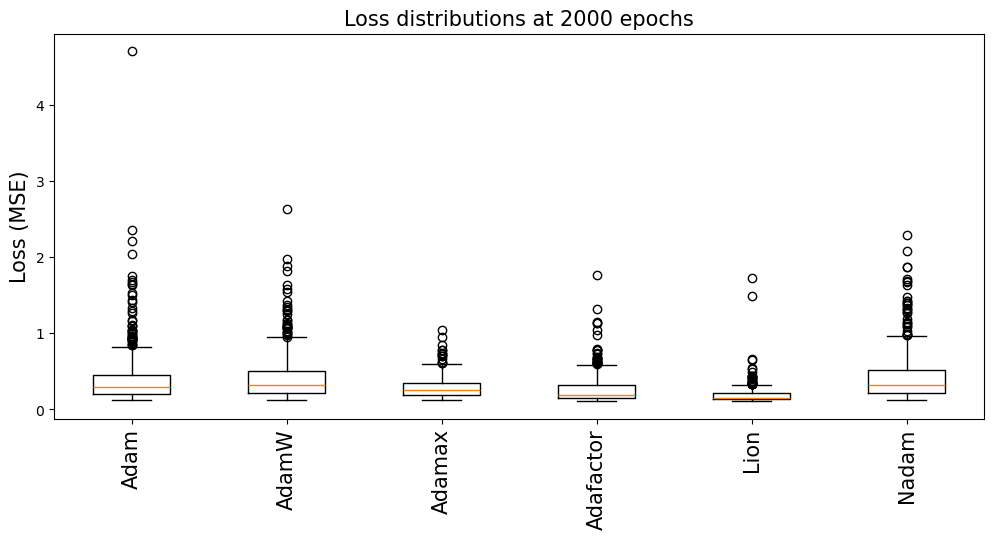

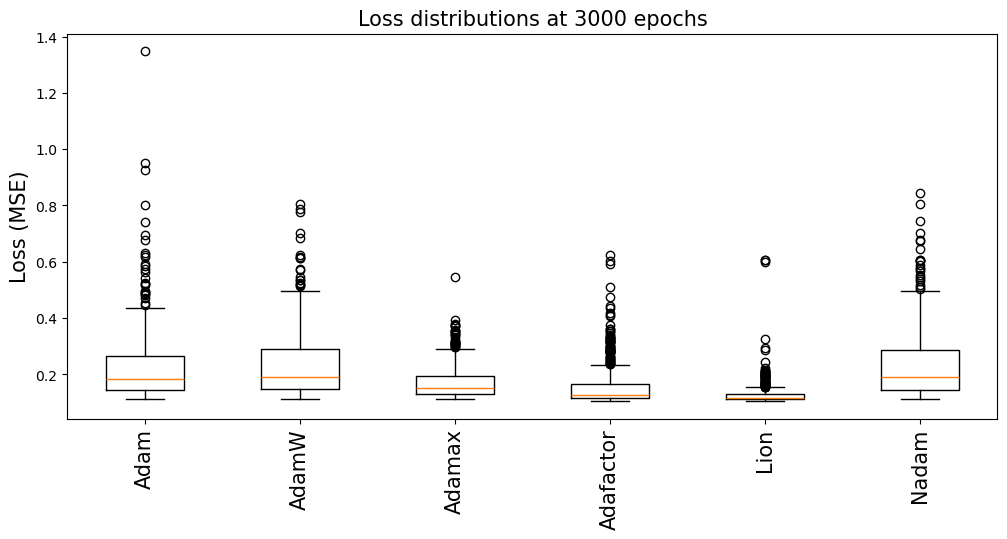

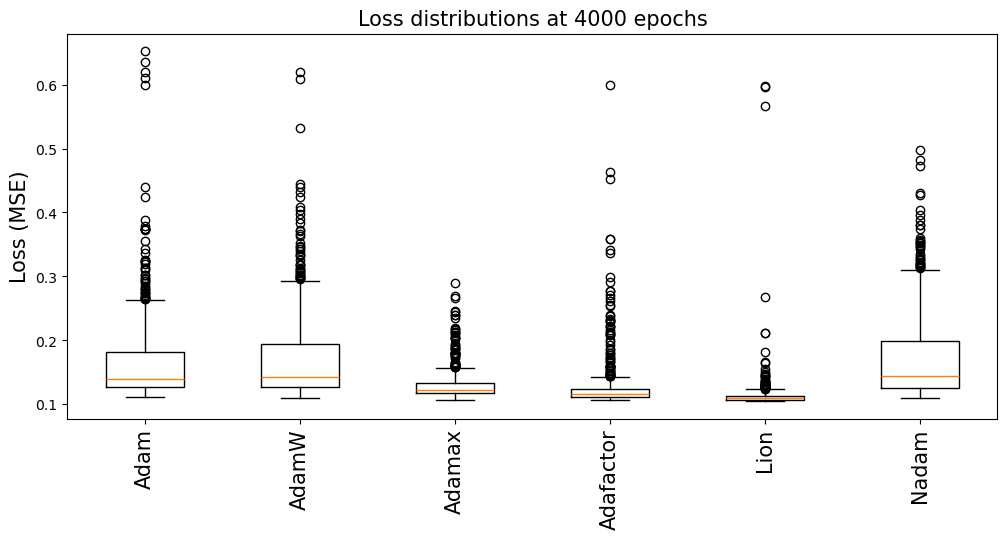

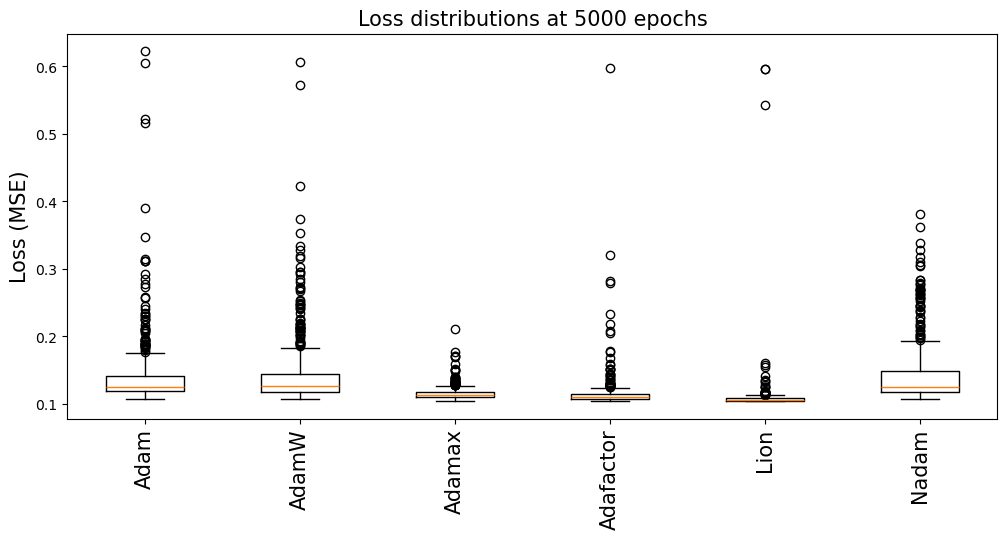

In [9]:
for i, loss_checkpoint in enumerate(optimizer_loss_checkpoints):

    fig, ax = plt.subplots(figsize = (12,5))

    optimizer_labels = list(optimizer_results.keys())

    ax.boxplot(loss_checkpoint)
    ax.set_xticklabels(optimizer_labels, rotation = 90, fontsize = 15)
    ax.set_ylabel("Loss (MSE)", fontsize = 15)
    ax.set_title(f"Loss distributions at {(i+1)*1000} epochs", fontsize = 15)

In [10]:
def get_axes_labels(axes, axis):
    if axis == 'x':
        return np.array([int(l.get_text().replace('−','-')) for l in axes.get_xticklabels()])
    if axis == 'y':
        return np.array([int(l.get_text().replace('−','-')) for l in axes.get_yticklabels()])
    
def scale(x, b):
    lower, upper = b
    transformed = lower + (upper - lower) * tf.sigmoid(x)
    return transformed

In [11]:
lgn_params = [
    'Frequency-time slope',
    'Onset time',
    'Amplitude-time slope',
    'Amplitude',
    'Response duration'
]
lgn_labelprops = {
    'name': lgn_params,
    'ylabel': ['Onset/SF', 'Time (ms)',
               'Au/SF', 'Au', 'Time (ms)'
               ],
    'ylim': [(20,200), (20,100), (-3,0), (0,4), (10,40)]
}

v1_labelprops = {
    'name': ['Inhibition delay', 'Inhibition weight'],
    'ylabel': ['Time (ms)', 'Au'],
    'ylim': [(0,40), (0,3)]
}

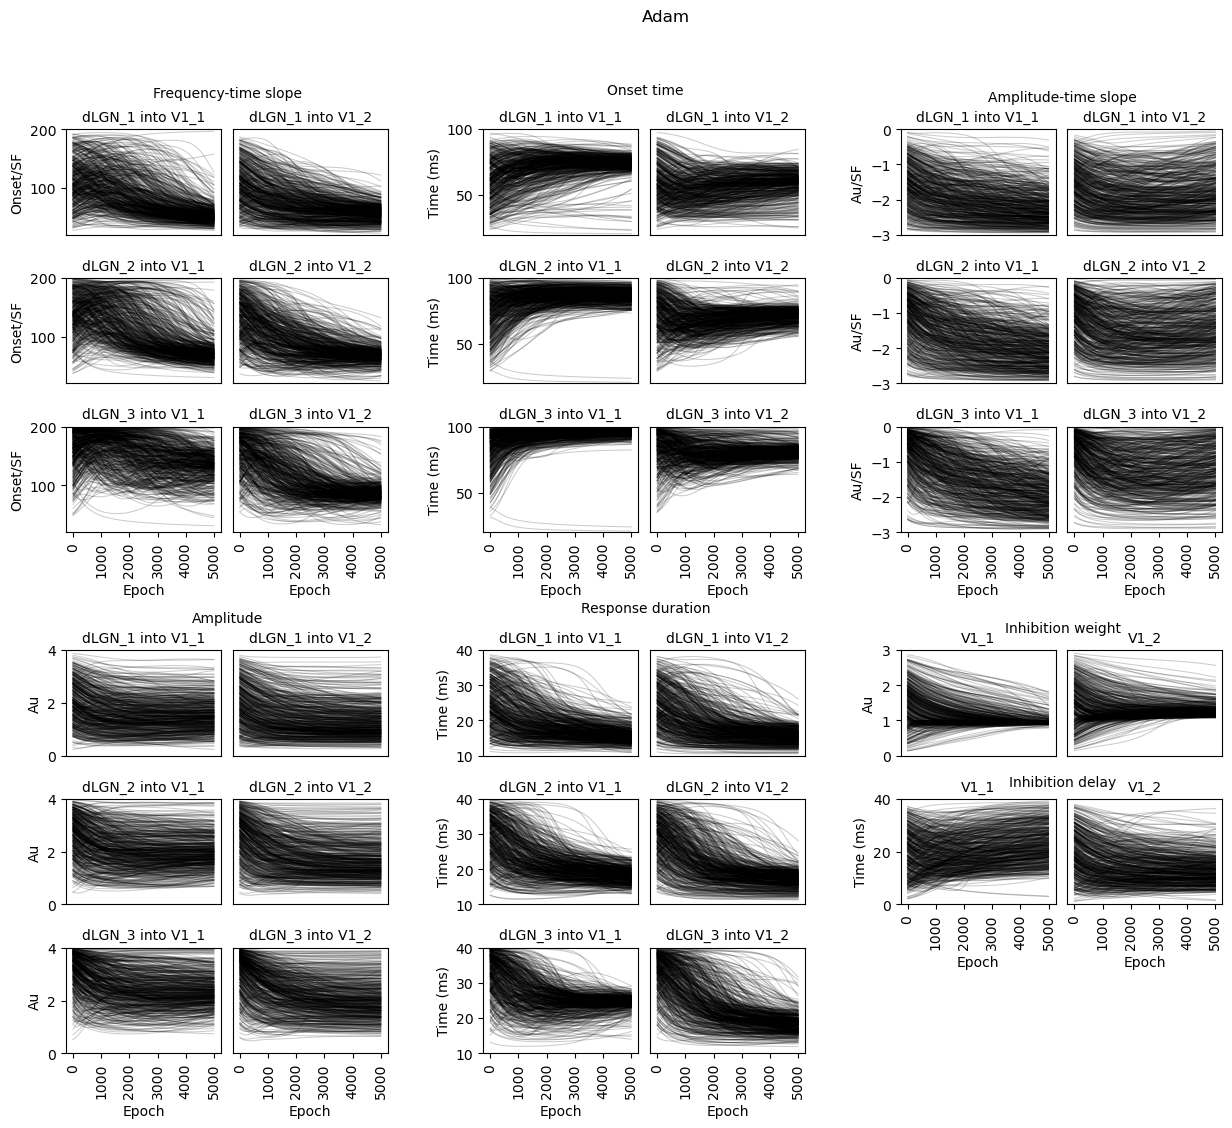

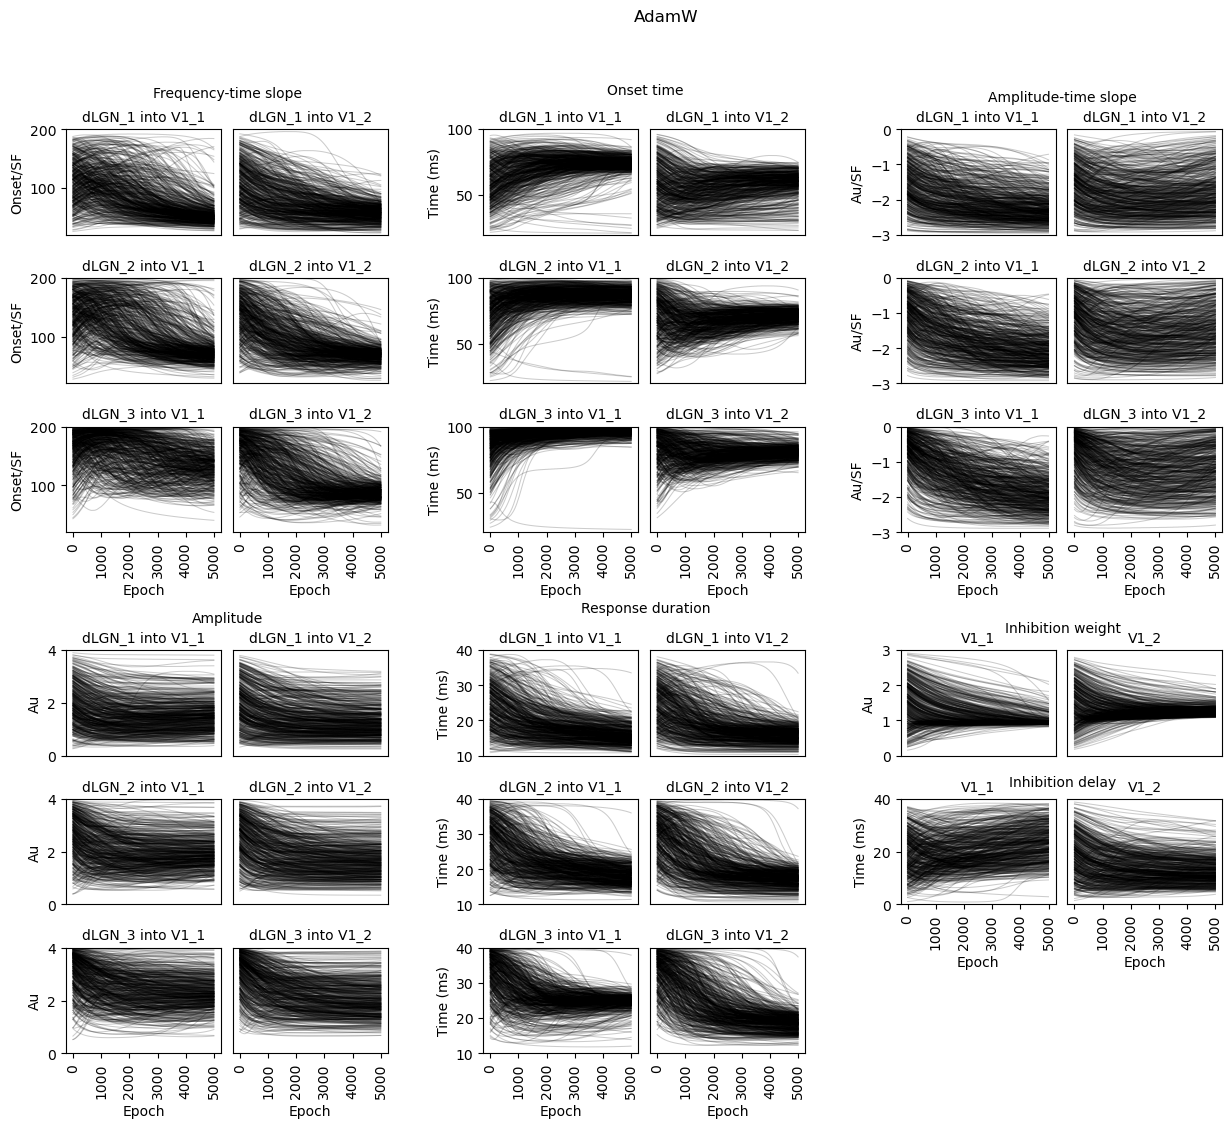

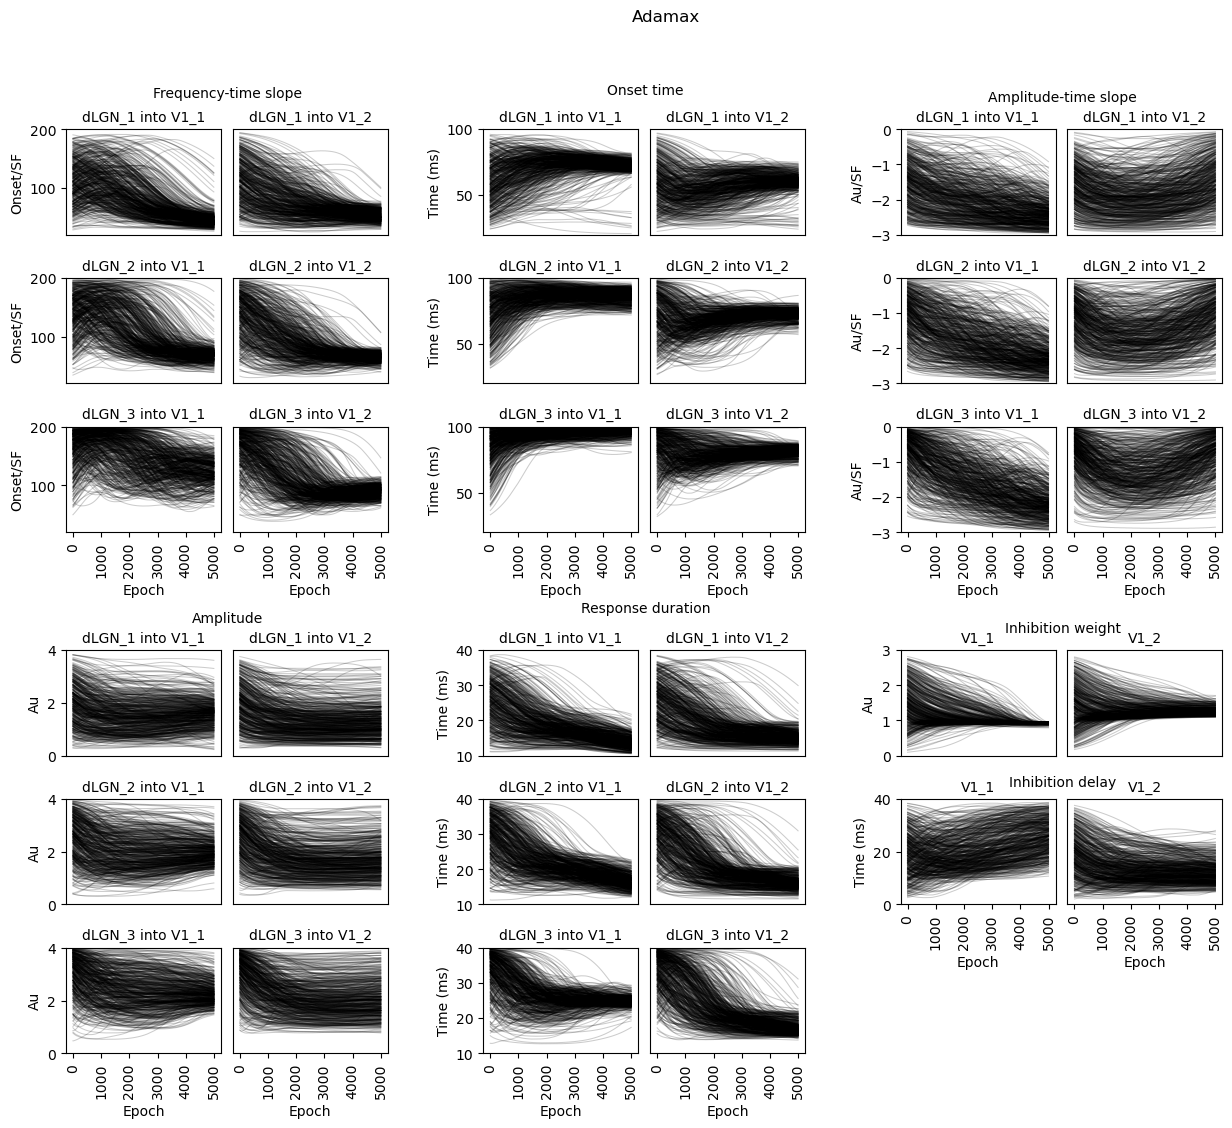

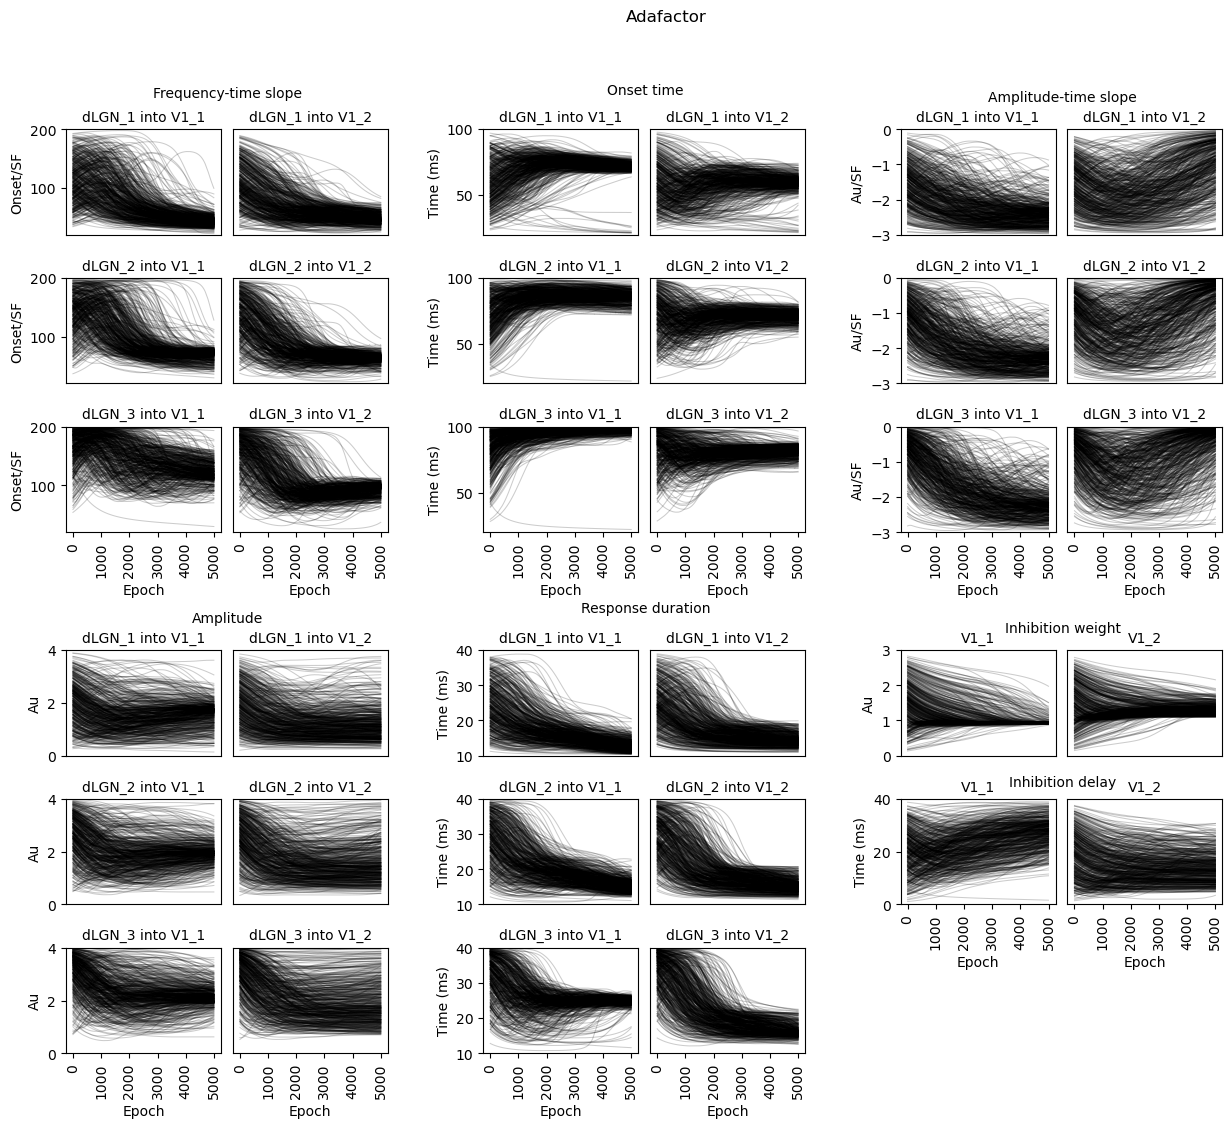

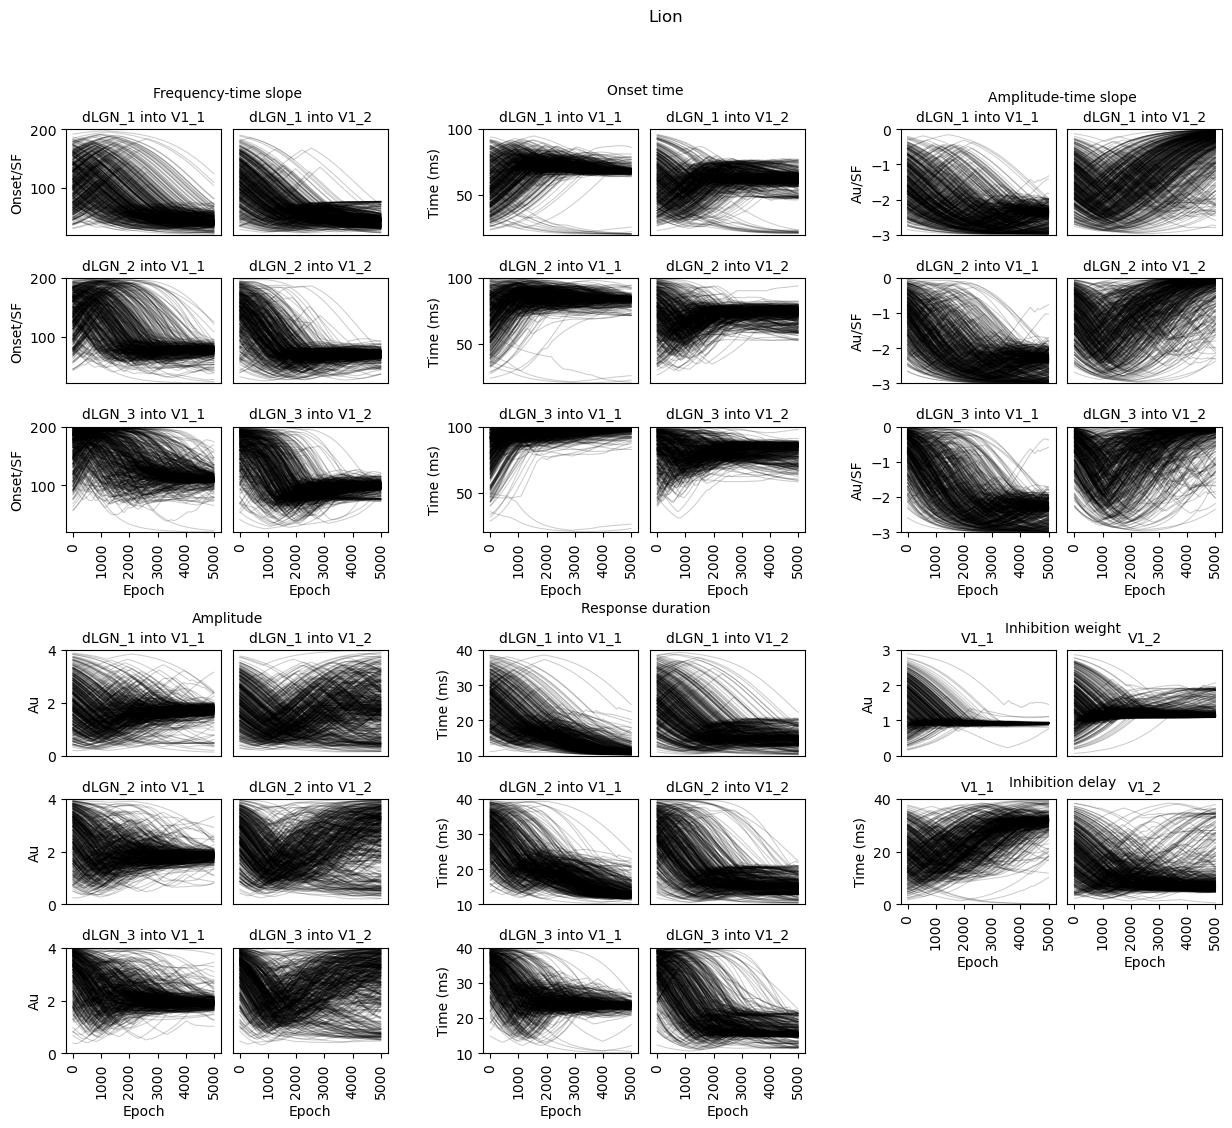

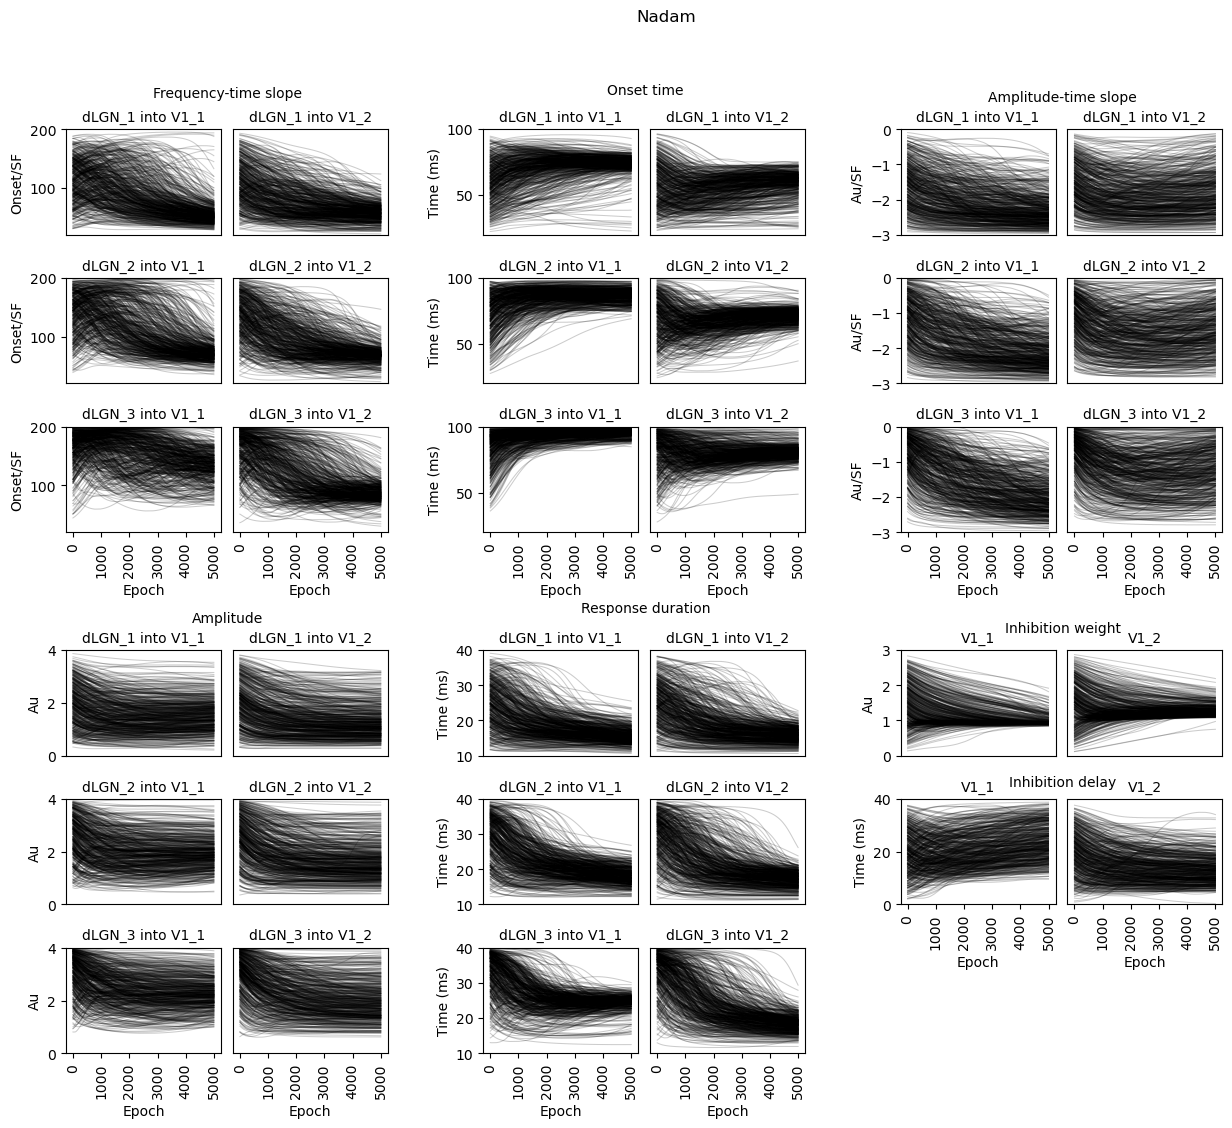

In [12]:
lgn_units = [
    'dLGN_1 into V1_1',
    'dLGN_2 into V1_1',
    'dLGN_3 into V1_1',
    'dLGN_1 into V1_2',
    'dLGN_2 into V1_2',
    'dLGN_3 into V1_2',
]

v1_units = [
    'V1_1',
    'V1_2'
]


for key, val in optimizer_results.items():
    results = val
    fig = plt.figure(figsize=(16, 12))
    grid = plt.GridSpec(25, 30, hspace=0.2, wspace=0.4)

    ax = []
    ax_i = 0
    for i0 in range(2,24,4):
        for i1 in range(1, 30, 5):
            if ax_i<18:
                if ax_i%2 == 0:
                    ax.append(fig.add_subplot(grid[i0-2:i0+1, i1-1:i1+3]))
                else:
                    ax.append(fig.add_subplot(grid[i0-2:i0+1, i1-2:i1+2]))

            else:
                if ax_i%2 == 0:
                    ax.append(fig.add_subplot(grid[i0:i0+3, i1-1:i1+3]))
                else:
                    ax.append(fig.add_subplot(grid[i0:i0+3, i1-2:i1+2]))

            if (11<ax_i<18) or (27<ax_i<34):
                ax[ax_i].set_xticks(np.arange(0,16000,1000))
                ax[ax_i].set_xticklabels(np.arange(0,16000,1000), rotation = 90)
                ax[ax_i].set_xlabel("Epoch")
            else:
                ax[ax_i].set_xticks([])

            ax_i+=1

    i_refs = np.append(np.arange(0, 6, 2), np.arange(18, 24, 2))
    for param, i_ref in zip(range(5), i_refs):
        i_unit = 0
        for v1_unit in range(2):
            for lgn_unit in range(3):

                ax[i_ref].plot(
                    results['param_history']['dLGN_params'][:,:,v1_unit,lgn_unit,param,0,0].T,
                    linewidth=0.75,
                    alpha=0.2,
                    color='black'
                    )
                
                ax[i_ref].set_ylim(lgn_labelprops['ylim'][param][0], lgn_labelprops['ylim'][param][1])

                if i_ref%2 == 0:
                    ax[i_ref].set_ylabel(lgn_labelprops['ylabel'][param])
                else:
                    ax[i_ref].set_yticks([])

                ax[i_ref].set_title(lgn_units[i_unit], fontsize = 10)
                i_unit+=1
                    
                i_ref+=6 
            i_ref-=17

    i_refs = [i_ref, i_ref+6]
    for param, i_ref in zip([1,0], i_refs):
        for v1_unit in range(2):

            ax[i_ref].plot(
                results['param_history']['V1_params'][:,:,v1_unit,0,param,0,0].T,
                linewidth=0.75,
                alpha=0.2,
                color='black'
                )
            
            ax[i_ref].set_ylim(v1_labelprops['ylim'][param][0], v1_labelprops['ylim'][param][1])

            if i_ref%2 == 0:
                ax[i_ref].set_ylabel(v1_labelprops['ylabel'][param])
            else:
                ax[i_ref].set_yticks([])

            ax[i_ref].set_title(v1_units[v1_unit], fontsize = 10)
            
            i_ref+=1
            
    ax[-2].set_visible(False)
    ax[-1].set_visible(False)

    for i, ax_i in enumerate(np.append(np.arange(0,6,2), np.arange(18, 24, 2))):
        b = (get_axes_labels(ax[ax_i], 'y')[0], get_axes_labels(ax[ax_i], 'y')[-1])
        if np.any(np.array(b)<0):
            b = (
                np.abs(get_axes_labels(ax[ax_i], 'y')[-1]), 
                np.abs(get_axes_labels(ax[ax_i], 'y')[0])
            )

        if b[0] != 0:
            b = (0, b[-1])

        h = get_axes_labels(ax[ax_i], 'y')[-1] + scale(-1.0, b).numpy()

        try:
            ax[ax_i].text(5500, h, lgn_params[i], ha = 'center')
        except IndexError:
            pass

    ax[22].text(5500, 3.5, "Inhibition weight", ha = 'center')
    ax[28].text(5500, 45, "Inhibition delay", ha = 'center')

    plt.suptitle(key)
    #plt.savefig(f'sgcc_{key}_optimizer_results.png', transparent = False, facecolor = 'white', bbox_inches = 'tight')

Notes: Although Lion reaches the lowest lost most quickly, it had a tendency to produce some degenerate solutions. Adafactor seems to be the next best choice.